In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import glob
import os

In [2]:
import re

In [50]:
file_dir_list = os.listdir()
file_dir_list = [i for i in file_dir_list if not ( i.startswith('.') or i.endswith('.ipynb') or i.endswith('.xls'))]
file_dir_list

['20190117-1',
 '20190125-1',
 '20190220-1',
 '20190312-1',
 '20190410-2',
 '20190425-1',
 '20190509-1',
 '20190529-2',
 '20190604-1',
 '20190704-1']

In [51]:
#获取当前文件夹下的所有目录及其目录里的文件

file_list = []
for i in file_dir_list:
    file_list1 = glob.glob('.\%s\*.txt'%i)
    file_list.extend(file_list1)
file_list

['.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_002_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_006_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_090_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_091_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_092_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_093_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_094_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_095_rawlib.bam.txt',
 '.\\20190125-1\\result-IonXpress_096_rawlib.bam.txt',
 '.\\20190220-1\\result-IonXpress_023_rawlib.bam.txt',
 '.\\20190312-1\\result-IonXpress_035_rawlib.bam.txt',
 '.\\20190312-1\\result-IonXpress_041_rawlib.bam.txt',
 '.\\20190312-1\\result-IonXpress_042_rawlib.bam.txt',
 '.\\20190312-1\\result-IonXpress_043_rawlib.bam.txt',
 '.\\20190410-2\\res-IonXpress_050_rawlib.bam.txt',
 '.\\20190410-2\\res-IonXpress_051_rawlib.bam.txt',
 '.\\20190425-1\\res-IonXpress_050_rawlib.bam_CHR16_20w.txt',
 '.\\2019

In [52]:
len(file_list)

32

In [53]:
dict1 = {}
for i in file_list:
    dateX = i.split('\\')[1]
    dict1[dateX] = []
    
for i in file_list:
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcode = re.search(r'_(\d+)_',barcodeExp).groups()[0]
#     display(dateX,barcode)
    dict1[dateX].append(barcode)
dict1
    

{'20190117-1': ['082'],
 '20190125-1': ['002', '006', '090', '091', '092', '093', '094', '095', '096'],
 '20190220-1': ['023'],
 '20190312-1': ['035', '041', '042', '043'],
 '20190410-2': ['050', '051'],
 '20190425-1': ['050', '051'],
 '20190509-1': ['050', '051'],
 '20190529-2': ['090', '092'],
 '20190604-1': ['090', '092'],
 '20190704-1': ['004', '005', '006', '007', '010', '011', '019']}

In [54]:
#根据 barcode和日期 得到 对应barcode的PGD的结果
pgd_data = pd.read_excel('res.xls')[[3,'PGD结果','日期']]
pgd_data.head()

,3,PGD结果,日期
0,16,未匹配到,NaN
1,接头,未匹配到,NaN
2,81,未匹配到,NaN
3,82,--SEA/ α α,20190117-1
4,83,未匹配到,NaN


In [55]:
for i in dict1:
    print(i)

20190117-1
20190125-1
20190220-1
20190312-1
20190410-2
20190425-1
20190509-1
20190529-2
20190604-1
20190704-1


In [56]:
# ['t_idx', 'bike_in_cnt']是取特定的列
# df1['bike_in_cnt'] > 10是取特定的行
# df2 = df1[['t_idx', 'bike_in_cnt']][df1['bike_in_cnt'] > 10]
# '.\\20190704-1\\IonXpress_019_rawlib.bam_CHR16_20w.txt'
results = pgd_data[[3,'PGD结果','日期']][(pgd_data['日期'] == '')].copy()
for i in dict1:
    res = pgd_data[[3,'PGD结果','日期']][(pgd_data['日期'] == i)].copy()
    results = pd.concat([results,res],join='outer',ignore_index=True)
results

,3,PGD结果,日期
0,82,--SEA/ α α,20190117-1
1,90,αα/αα,20190125-1
2,91,--SEA/--SEA,20190125-1
3,92,--SEA/--SEA,20190125-1
4,93,--SEA/ α α,20190125-1
5,94,--SEA/ α α,20190125-1
6,95,αα/αα,20190125-1
7,96,--SEA/ α α,20190125-1
8,2,--SEA/--SEA,20190125-1
9,6,αα/αα,20190125-1


In [160]:
results.to_csv('pgd.txt',index=False,sep='\t')

In [57]:
results['PGD结果'].unique()

array(['--SEA/ α α', 'αα/αα', '--SEA/--SEA', ' --SEA/αCSα',
       ' --SEA/-α3.7'], dtype=object)

In [199]:
targets_dict = {'αα/αα':0,'--SEA/ α α':1,'--SEA/--SEA':2,' --SEA/αCSα':1,' --SEA/-α3.7':3}
targets_dict

{'αα/αα': 0,
 '--SEA/ α α': 1,
 '--SEA/--SEA': 2,
 ' --SEA/αCSα': 1,
 ' --SEA/-α3.7': 3}

In [200]:
#获取映射的PGD数字结果
target_dict_num = {}
for i in range(len(results.index.values)):
    date = results.loc[i]['日期']
    barcode = results.loc[i][3]
    pgd_res = results.loc[i]['PGD结果']
    target_dict_num['sample_%s_%.3d'%(date,barcode)] = targets_dict[pgd_res]
target_dict_num

{'sample_20190117-1_082': 1,
 'sample_20190125-1_090': 0,
 'sample_20190125-1_091': 2,
 'sample_20190125-1_092': 2,
 'sample_20190125-1_093': 1,
 'sample_20190125-1_094': 1,
 'sample_20190125-1_095': 0,
 'sample_20190125-1_096': 1,
 'sample_20190125-1_002': 2,
 'sample_20190125-1_006': 0,
 'sample_20190220-1_023': 0,
 'sample_20190312-1_035': 0,
 'sample_20190312-1_041': 0,
 'sample_20190312-1_042': 0,
 'sample_20190312-1_043': 1,
 'sample_20190410-2_050': 1,
 'sample_20190410-2_051': 0,
 'sample_20190425-1_050': 1,
 'sample_20190425-1_051': 0,
 'sample_20190509-1_050': 1,
 'sample_20190509-1_051': 0,
 'sample_20190529-2_090': 3,
 'sample_20190529-2_092': 3,
 'sample_20190604-1_090': 3,
 'sample_20190604-1_092': 3,
 'sample_20190704-1_004': 1,
 'sample_20190704-1_005': 1,
 'sample_20190704-1_006': 0,
 'sample_20190704-1_007': 0,
 'sample_20190704-1_010': 0,
 'sample_20190704-1_011': 0,
 'sample_20190704-1_019': 0}

In [11]:
# 写个转换行列的函数
def change_row_col(df_obj,date,barcode):
    sort_result = df_obj.sort_values('Position').copy()
    mydf = DataFrame(columns=sort_result['Position'])
    mydf.loc['sample_%s_%s'%(date,barcode)]=sort_result['deep'].values
    return mydf

In [13]:
# 创建深度模板区间
temp_Position_range = np.arange(71277,336702)
temp_deep_range = np.arange(0,265425)
template_df = DataFrame(columns=temp_Position_range)
template_df.loc['template_sample']=temp_deep_range
template_df

,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
template_sample,0,1,2,3,4,5,6,7,8,9,...,265415,265416,265417,265418,265419,265420,265421,265422,265423,265424


In [12]:
#测试单个样本
sampleX = pd.read_csv(file_list[0],sep='\t',header=None,names=['Position','deep'])
sampleX
change_row_col(sampleX,'20190117-1','82')

Position,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_20190117-1_82,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,45.0,45.0


In [60]:
#行列倒置所有样本，合并所有样本到模板
merge_res = template_df.copy()
for i in file_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX = i.split('\\')[1]
    barcodeExp = i.split('\\')[2]
    barcodeX = re.search(r'_(\d+)_',barcodeExp).groups()[0]
    
    sampleX = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
    res_sample = change_row_col(sampleX,dateX,barcodeX)
    
    merge_res = pd.concat([merge_res,res_sample],join='outer')
merge_res

Position,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
template_sample,0,1,2,3,4,5,6,7,8,9,...,265415,265416,265417,265418,265419,265420,265421,265422,265423,265424
sample_20190117-1_082,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_002,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_006,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_090,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_091,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_092,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_093,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_094,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45
sample_20190125-1_095,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,46,46,45,45


In [71]:
# 建立样本target映射函数
def myindex(arg):
    return target_dict_num.get(arg)

In [201]:
#开始映射
merge_res2 = merge_res.copy()
merge_res2['the_index'] = merge_res2.index.values
merge_res2['target'] = merge_res2['the_index'].map(myindex)

In [202]:
#整理训练数据
merge_res3 = merge_res2.iloc[1:].copy()
merge_res3

Position,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336694,336695,336696,336697,336698,336699,336700,336701,the_index,target
sample_20190117-1_082,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190117-1_082,1.0
sample_20190125-1_002,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_002,2.0
sample_20190125-1_006,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_006,0.0
sample_20190125-1_090,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_090,0.0
sample_20190125-1_091,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_091,2.0
sample_20190125-1_092,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_092,2.0
sample_20190125-1_093,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_093,1.0
sample_20190125-1_094,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_094,1.0
sample_20190125-1_095,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_095,0.0
sample_20190125-1_096,9,9,9,9,10,10,10,10,10,10,...,46,46,46,46,46,46,45,45,sample_20190125-1_096,1.0


In [66]:
# condition = merge_res.loc['sample'].isnull()
# merge_res.loc['sample'][condition].unique()

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
data_the = merge_res3.values[:,:-2]
data_the

array([[9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0],
       [9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0],
       [9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0],
       ...,
       [9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0],
       [9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0],
       [9.0, 9.0, 9.0, ..., 46.0, 45.0, 45.0]], dtype=object)

In [117]:
data_the.shape

(32, 265425)

In [204]:
the_target = merge_res3['target'].values
the_target

array([1., 2., 0., 0., 2., 2., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 3., 3., 3., 3., 1., 1., 0., 0., 0., 0., 0.])

In [205]:
targets_dict

{'αα/αα': 0,
 '--SEA/ α α': 1,
 '--SEA/--SEA': 2,
 ' --SEA/αCSα': 1,
 ' --SEA/-α3.7': 3}

In [129]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(data_the, the_target, test_size=0.2)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(25, 265425) (25,)
(7, 265425) (7,)


In [207]:
my_knn2 = KNeighborsClassifier()
my_knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [208]:
my_knn2.predict(X_test)

array([3., 3., 3., 3., 3., 3., 3.])

In [209]:
y_test

array([1., 1., 0., 0., 0., 1., 3.])

In [211]:
my_knn2.score(X_test,y_test)

0.14285714285714285

In [210]:
my_knn2.score(X_train,y_train)

0.12

In [140]:
#使用逻辑斯蒂
from sklearn.linear_model import LogisticRegression 

In [195]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1.])

In [196]:
y_test

array([3., 2., 3., 2., 1., 2., 1.])

In [197]:
logistic.score(X_train,y_train)

0.52

In [198]:
logistic.score(X_test,y_test)

0.2857142857142857

In [145]:
# 使用高斯分布贝叶斯
from sklearn.naive_bayes import GaussianNB

In [146]:
g_NB = GaussianNB()
g_NB.fit(X_train,y_train)

GaussianNB(priors=None)

In [147]:
g_NB.predict(X_test)

F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:432: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


array([0., 0., 0., 0., 0., 0., 0.])

In [148]:
g_NB.score(X_train,y_train)

F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:432: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


0.56

In [149]:
g_NB.score(X_test,y_test)

F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:432: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
F:\mySoftware\anacoda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


0.8571428571428571

In [150]:
#使用决策树
from sklearn.tree import DecisionTreeClassifier

In [151]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
dt.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0.])

In [153]:
dt.score(X_train,y_train)

0.56

In [154]:
dt.score(X_test,y_test)

0.8571428571428571

In [155]:
#使用支持向量机
from sklearn import svm

In [161]:
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(X_train, y_train)

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
clf.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0.])

In [163]:
clf.score(X_test, y_test)  # 精度

0.8571428571428571

In [164]:
clf.score(X_train,y_train)

0.56

In [ ]:
from sklearn import d

In [122]:
predict_list = glob.glob('..\pre_data\*.txt')
predict_list

['..\\pre_data\\result-IonXpress_001_rawlib.bam.txt',
 '..\\pre_data\\result-IonXpress_002_rawlib.bam.txt',
 '..\\pre_data\\result-IonXpress_003_rawlib.bam.txt']

In [124]:
#获取预测数据
predict_list = glob.glob('..\pre_data\*.txt')
#行列倒置所有样本，合并所有样本到模板
predict_merge_res = template_df.copy()
for i in predict_list:
#     '.\\20190117-1\\result-IonXpress_082_rawlib.bam.txt',
    dateX2 = i.split('\\')[1]
    barcodeExp2 = i.split('\\')[2]
    barcodeX2 = re.search(r'_(\d+)_',barcodeExp2).groups()[0]
    
    sampleX2 = pd.read_csv(i,sep='\t',header=None,names=['Position','deep'])
    res_sample2 = change_row_col(sampleX2,dateX2,barcodeX2)
    
    predict_merge_res = pd.concat([predict_merge_res,res_sample2],join='outer')
predict_merge_res

Position,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
template_sample,0,1,2,3,4,5,6,7,8,9,...,265415,265416,265417,265418,265419,265420,265421,265422,265423,265424
sample_pre_data_001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_pre_data_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_pre_data_003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
x_test = predict_merge_res.iloc[1:4]
x_test

Position,71277,71278,71279,71280,71281,71282,71283,71284,71285,71286,...,336692,336693,336694,336695,336696,336697,336698,336699,336700,336701
sample_pre_data_001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_pre_data_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_pre_data_003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
my_knn.predict(x_test)


array([0., 0., 0.])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x=mydf022.columns.values.copy()
y=mydf022.loc['sample'].values.copy()
display(x,y)

array([ 71277,  71278,  71279, ..., 336699, 336700, 336701], dtype=int64)

array([6, 6, 6, ..., 62, 63, 63], dtype=object)

In [11]:
display(y.min(),y.max())

0

9169

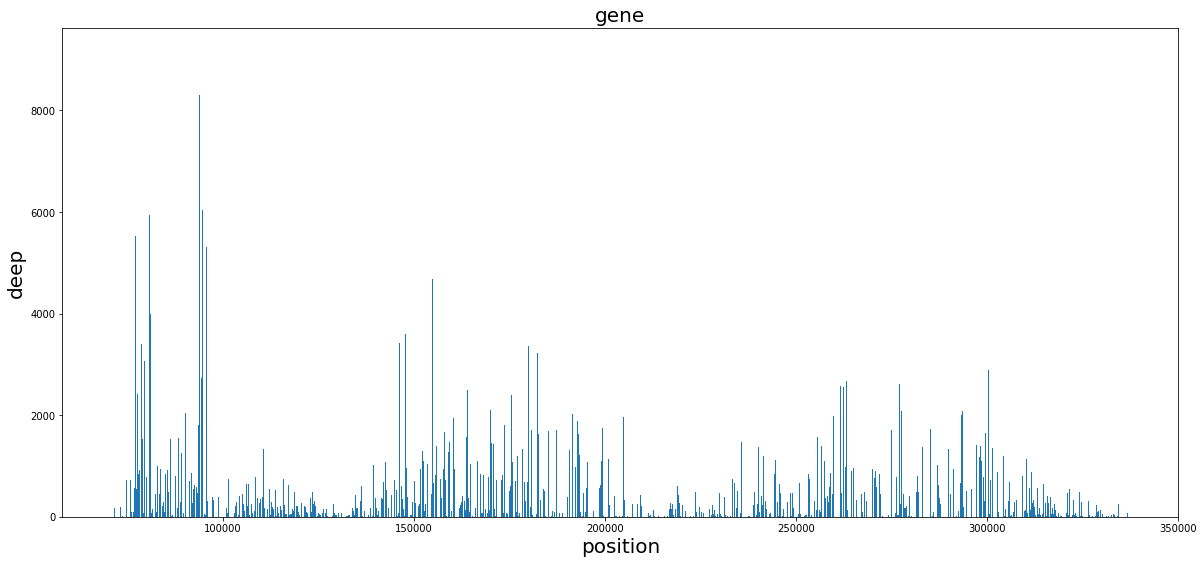

In [12]:
my_img = plt.figure(figsize=(20,9))
# plt.axis([71277,336701,0,9169])
plt.title("gene",fontsize=20) 
plt.xlabel("position",fontsize=20)
plt.ylabel('deep',fontsize=20)
plt.bar(x,y)
plt.show()